# Classification of Chest x-ray scan for Pneumonia using Convolutional Neural Network

What is a chest x-ray?
The chest x-ray is the most commonly performed diagnostic x-ray examination. A chest x-ray produces images of the heart, lungs, airways, blood vessels and the bones of the spine and chest.

An x-ray exam helps doctors diagnose and treat medical conditions. It exposes you to a small dose of ionizing radiation to produce pictures of the inside of the body. X-rays are the oldest and most often used form of medical imaging.

What are some common uses of the procedure?\
The chest x-ray is performed to evaluate the lungs, heart and chest wall.

A chest x-ray is typically the first imaging test used to help diagnose symptoms such as:

- Breathing difficulties
- A bad or persistent cough
- Chest pain or injury
- Fever

Physicians use the examination to help diagnose or monitor treatment for conditions such as:

- Pneumonia
- Heart failure and other heart problems
- Emphysema
- Lung cancer
- Positioning of medical devices
- Fluid or air collection around the lungs
- Other medical conditions\
source:https://www.radiologyinfo.org/en/info/chestrad

# Importing the required libraries needed 

In [1]:
import os
import pathlib
import PIL
import PIL.Image

import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.math import confusion_matrix
import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Preprocessing

In [3]:
#data location/path=directory
data_dir=pathlib.Path('C:/Users/val-c/Machine Learning_Deep Learning/xray chest scan')
data_dir


WindowsPath('C:/Users/val-c/Machine Learning_Deep Learning/xray chest scan')

- Examining the test and train classes in the directory

In [4]:
#trainsets subdirectory

normal_train=pathlib.Path ('C:/Users/val-c/Machine Learning_Deep Learning/xray chest scan/train/NORMAL')

pneumo_train=pathlib.Path('C:/Users/val-c/Machine Learning_Deep Learning/xray chest scan/train/PNEUMONIA')

In [5]:
#testsets subdirectory

normal_test=pathlib.Path('C:/Users/val-c/Machine Learning_Deep Learning/xray chest scan/test/NORMAL')

pneumo_test=pathlib.Path('C:/Users/val-c/Machine Learning_Deep Learning/xray chest scan/test/PNEUMONIA')

In [6]:
print("Train set Length",len(list(normal_train.glob('*.jpeg')))+len(list(pneumo_train.glob('*.jpeg'))))
print("Test set Length",len(list(normal_test.glob('*.jpeg')))+len(list(pneumo_test.glob('*.jpeg'))))

print("Count of Normal images in Train set",len(list(normal_train.glob('*.jpeg'))))
print("Count of Pneumonia images in Train Set",len(list(pneumo_train.glob('*.jpeg'))))

Train set Length 115
Test set Length 35
Count of Normal images in Train set 74
Count of Pneumonia images in Train Set 41


- Visualizing an image from each training sets (Normal and pneumonia)

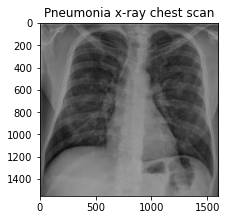

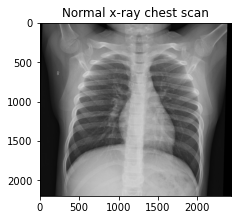

In [7]:
plt.figure(figsize=(5, 7))
plt.subplot(2,1,1)
plt.imshow(cv2.imread("C:/Users/val-c/Machine Learning_Deep Learning/xray chest scan/train/PNEUMONIA/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg"))
_=plt.title('Pneumonia x-ray chest scan')

plt.figure(figsize=(5, 7))
plt.subplot(2,1,2)
plt.imshow(cv2.imread("C:/Users/val-c/Machine Learning_Deep Learning/xray chest scan/train/NORMAL/NORMAL2-IM-0033-0001.jpeg"))
_=plt.title('Normal x-ray chest scan')

# Spliting the datasets into train,validation and test sets, and Standardizing or Normalizing the data

In [8]:
train_images_dict={ 'normal':list(normal_train.glob('*.jpeg')), 'pneumonia':list(pneumo_train.glob('*.jpeg'))}

test_images_dict={'normal':list(normal_test.glob('*.jpeg')), 'pneumonia':list(pneumo_test.glob('*.jpeg'))}

labels_dict={'normal':0,'pneumonia':1}

In [9]:
X,y=[],[]
for label,images in train_images_dict.items():
    for image in images:
        img=cv2.imread(str(image),0)
        img=cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
        X.append(img)
        y.append(labels_dict[label])
        
X=np.array(X)
X=X/255
y=np.array(y)

X_test,y_test=[],[]
for label,images in test_images_dict.items():
    for image in images:
        img=cv2.imread(str(image),0)
        img=cv2.resize(img,(200,200),interpolation=cv2.INTER_AREA)
        X_test.append(img)
        y_test.append(labels_dict[label])

X_test=np.array(X_test)
X_test=X_test/255
y_test=np.array(y_test)


In [10]:
# split the data sets and 20% would be used for testing while the rest would be used for training and validation
X_train,X_val,y_train,y_val=train_test_split(X,y,stratify=y,random_state=69,test_size=0.20)

In [11]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)
X_val=np.expand_dims(X_val,-1)

In [12]:
print("Shape of Train Set",X_train.shape)
print("Shape of Validation Set",X_val.shape)
print("Shape of Test Set",X_test.shape)

Shape of Train Set (92, 200, 200, 1)
Shape of Validation Set (23, 200, 200, 1)
Shape of Test Set (35, 200, 200, 1)


*The training data contains 200*200 pixels with 92 training sets and black&white color channel. 35 datasets would be used for testing , while 23 would be used for validation.*

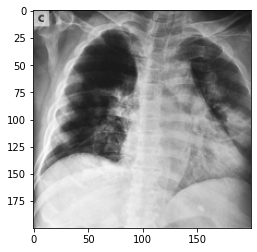

In [13]:
#result of the normalized training data
result=plt.imshow(X_train[0],cmap='gray') #pick an image of just 1


In [14]:
#stop training when a monitored metric has stopped improving
earlystopping=tf.keras.callbacks.EarlyStopping(
    patience=3,
    monitor='val_loss',
    mode='auto'
)

# Creating the model

The Convolutional Neural Network is used here which is ideal for medical imaging data

In [15]:
model = Sequential()
image_shape=(200,200,1)
#first layer
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

#hidden layer
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

#Adding Dropouts to help reduce overfitting
model.add(Dropout(0.5))

#output layer, sigmoid used here for activation
model.add(Dense(1))
model.add(Activation("sigmoid"))


# Compiling the model

the adam optimizer and the BinaryCrossentropy for probabilitic losses are used to compile the model

In [16]:
#using model.compile() to compile the model with the optimizer and loss function

model.compile(optimizer='adam',
               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [17]:
model.summary() #compute model summary after compilation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [18]:
#Generate DataAugmentation
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Train the model

In [19]:
#using the model.fit() to train data
history =model.fit(
    datagen.flow(X_train,y_train,batch_size=32),
    validation_data=datagen.flow(X_val,y_val,batch_size=32),
    shuffle=True,
    epochs=50,
    callbacks=[earlystopping]
)

Epoch 1/50
3/3 [==============================] - 12s 3s/step - loss: 0.7170 - accuracy: 0.5217 - val_loss: 0.6666 - val_accuracy: 0.6957
Epoch 2/50
3/3 [==============================] - 7s 2s/step - loss: 0.6502 - accuracy: 0.6413 - val_loss: 0.6057 - val_accuracy: 0.6522
Epoch 3/50
3/3 [==============================] - 6s 2s/step - loss: 0.6312 - accuracy: 0.6413 - val_loss: 0.5828 - val_accuracy: 0.6522
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 0.6182 - accuracy: 0.6413 - val_loss: 0.5807 - val_accuracy: 0.6522
Epoch 5/50
3/3 [==============================] - 6s 2s/step - loss: 0.6066 - accuracy: 0.6957 - val_loss: 0.5600 - val_accuracy: 0.6522
Epoch 6/50
3/3 [==============================] - 6s 2s/step - loss: 0.5322 - accuracy: 0.6630 - val_loss: 0.4783 - val_accuracy: 0.7826
Epoch 7/50
3/3 [==============================] - 7s 2s/step - loss: 0.4816 - accuracy: 0.8152 - val_loss: 0.4368 - val_accuracy: 0.8261
Epoch 8/50
3/3 [========================

In [20]:
# viewing the training history in pandas table
import pandas as pd
losses = pd.DataFrame(history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.717030,0.521739,0.666646,0.695652
1,0.650230,0.641304,0.605658,0.652174
2,0.631227,0.641304,0.582777,0.652174
3,0.618199,0.641304,0.580658,0.652174
4,0.606613,0.695652,0.559951,0.652174


# Visualizing training results

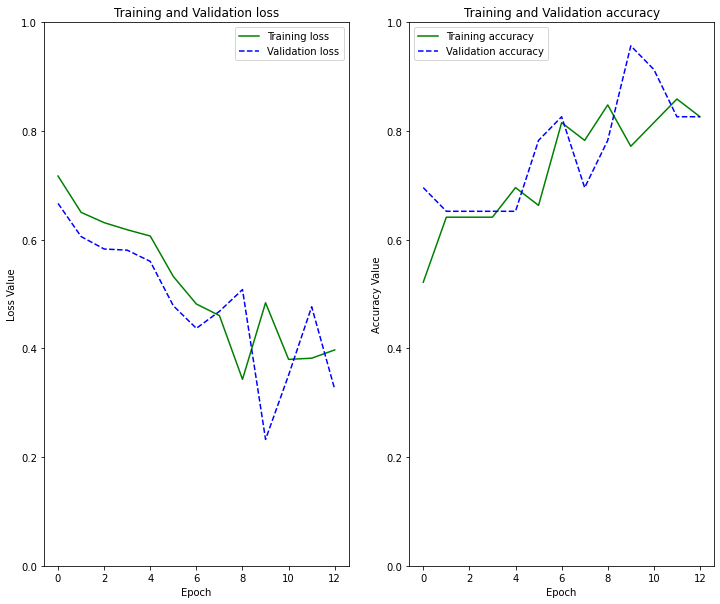

In [21]:
#training history
loss = history.history['loss']
val_loss = history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

#Training and Validation loss
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, loss, 'g', label='Training loss')
plt.plot(history.epoch, val_loss, 'b--', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()

#Training and Validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, acc, 'g', label='Training accuracy')
plt.plot(history.epoch, val_acc, 'b--', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.ylim([0, 1])
plt.legend()

#display plot
plt.show()

# Evaluating the accuracy on the test sets

In [22]:
#evaluate on test data
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 47ms/step - loss: 0.1346 - accuracy: 1.0000


[0.13462117314338684, 1.0]

# Making predictions

In [23]:
#predict on test data
predictions = model.predict(X_test)
print(predictions.shape)

2/2 [==============================] - 1s 51ms/step
(35, 1)


In [24]:
cf_matrix=confusion_matrix(y_test,model.predict(X_test)>0.5)
cf_matrix

2/2 [==============================] - 0s 53ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20,  0],
       [ 0, 15]])>

In [25]:
def plot_conf(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='viridis')

    ax.set_title(' Confusion Matrix for the actual and predicted values');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    #Tick labels 
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

    #Display Matrix
    plt.show()

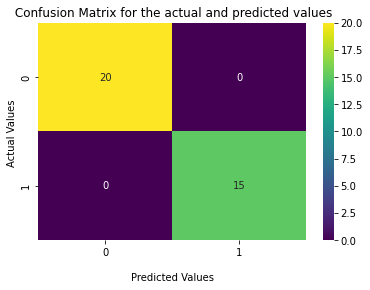

In [26]:
#visualize performance
plot_conf(cf_matrix) 

Normal:0, Pneumonia:1

# Saving model

In [27]:
model.save('chest xray pneumonia')

INFO:tensorflow:Assets written to: chest xray pneumonia\assets


INFO:tensorflow:Assets written to: chest xray pneumonia\assets
